# Figure 4


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

**Figure 4A:** Schematic of the experiment

Mean CRISPRa copy number [cnts/cell]: 88.689781
Mean WT copy number [cnts/cell]: 50.706150
Mean CRISPRi copy number [cnts/cell]: 11.055556


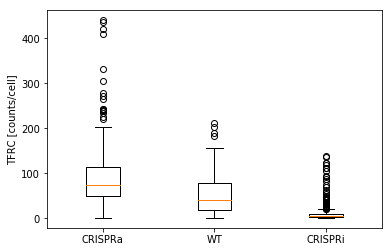

In [3]:
# Load the dataframes

# WT
df_wt_1 = pd.read_csv('./Figure4B/WT/WT_ISP-2018-11-02-09-49-00-0001_20181214.csv')
df_wt_2 = pd.read_csv('./Figure4B/WT/WT_ISP-2018-11-02-09-49-00-0002_20181213.csv')

# CRISPRi
df_i_1 = pd.read_csv('./Figure4B/CRISPRi/CRISPRi_ISP-2018-10-31-13-28-00-0004.csv')
df_i_2 = pd.read_csv('./Figure4B/CRISPRi/CRISPRi_ISP-2018-10-31-13-28-00-0005.csv')

# CRISPRa
df_a_1 = pd.read_csv('./Figure4B/CRISPRa/CRISPRa_ISP-2018-11-02-09-49-00-0001.csv')
df_a_2 = pd.read_csv('./Figure4B/CRISPRa/CRISPRa_ISP-2018-11-02-09-49-00-0002.csv')

# Combine the dataframes
wt_counts = np.append(df_wt_1.n_spots.values, df_wt_2.n_spots.values)
i_counts = np.append(df_i_1.n_spots.values, df_i_2.n_spots.values)
a_counts =  np.append(df_a_1.n_spots.values, df_a_2.n_spots.values)

# Plot
plt.boxplot([a_counts, wt_counts, i_counts]);
plt.ylabel('TFRC [counts/cell]');
plt.xticks([1, 2, 3], ['CRISPRa','WT', 'CRISPRi']);

print('Mean CRISPRa copy number [cnts/cell]: %f' % np.mean(a_counts))
print('Mean WT copy number [cnts/cell]: %f' % np.mean(wt_counts))
print('Mean CRISPRi copy number [cnts/cell]: %f' % np.mean(i_counts))

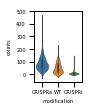

In [82]:
import numpy as np
import seaborn as sns

counts = np.concatenate((a_counts, wt_counts, i_counts))

a_labels = ['CRISPRa'] * len(a_counts)
wt_labels = ['WT'] * len(wt_counts)
i_labels = ['CRISPRi'] * len(i_counts)

modification = a_labels + wt_labels + i_labels

df = pd.DataFrame(data={'counts': counts, 'modification': modification})

fig_size = (1.25, 1.5)

fig, ax = plt.subplots(figsize=fig_size)

sns.set_context("paper", rc={"font.size":5,"axes.titlesize":5,"axes.labelsize":5, "ytick.labelsize": 5,"xtick.labelsize": 5})
sns.violinplot(x="modification", y="counts", data=df, scale='count', linewidth=0.5);
#sns.swarmplot(x="modification", y="counts", data=df, alpha=.45, color='black', size=1.5);


plt.tight_layout()
fig.set_size_inches(fig_size[0], fig_size[1])

plt.savefig("Figure4B.pdf", transparent=True, bbox_inches = "tight")

**Figure 4B:** Distributions

**Figure 4C:** Plot of GFP vs. knockdown